In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [40]:
files = {'Ensemble':'/home/dlachinov/brats2019/data/excel_val/ensemble.csv',
        'Distill':'/home/dlachinov/brats2019/data/excel_val/023r3.csv',
        'ResUNet':'/home/dlachinov/brats2019/data/excel_val/023r2.csv',
        }


In [41]:
data_frames = []

for idx,(k,v) in enumerate(files.items()):
    df = pd.read_csv(files[k]).assign(Location=k)
    data_frames.append(df)
    
cdf = pd.concat(data_frames)
mdf = pd.melt(cdf.loc[:,['Dice_ET', 'Dice_WT', 'Dice_TC', 'Location']], id_vars=['Location'], var_name=['Region'])
print(mdf.head())

   Location   Region    value
0  Ensemble  Dice_ET  0.93253
1  Ensemble  Dice_ET  0.87987
2  Ensemble  Dice_ET  0.89202
3  Ensemble  Dice_ET  0.45764
4  Ensemble  Dice_ET  0.83493


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


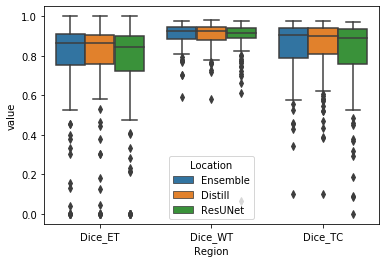

In [42]:
ax = sns.boxplot(x="Region", y="value", hue="Location", data=mdf)
plt.savefig('test_plot.eps', format='eps')
plt.show()


In [46]:
stats.mannwhitneyu(cdf.loc[cdf.Location=='Ensemble','Dice_TC'],cdf.loc[cdf.Location=='Distill','Dice_TC'],alternative='greater')

MannwhitneyuResult(statistic=7900.0, pvalue=0.43952171166257625)